**Author : Dharmin Solanki (ID: 201701198)**

Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

**-------------------------------------------------------------------------------------------**

Defining true function f(x) = x + 2•sin(1.5x).

In [0]:
a=1.5
pi=np.pi
its=1000  # =number of experiments
k=12000

temp=((2*pi)/(a*its))*k
step=(temp-1)/1000

x=np.arange(1, temp, step)

temp0=np.sin(a*x)

f0 = x + 2*temp0    #true function

mean=0
var=2
std=np.sqrt(var)

f = np.zeros([its,len(x)])

for i in range(its):
  noise = np.random.normal(mean, var, its)
  f[i] = f0 + noise   #function with noise

**####################################################################**

**Question 1 -** Linear hypothesis model : h(θ) = θ₀ + θ₁•x .

> Calculating h(θ).

In [0]:
theta = np.zeros([its, 2])

temp3 = np.ones((len(x),1))
X = np.c_[temp3,x]
Xtx=np.matmul(X.T,X)
Xtx_inv=np.linalg.inv(Xtx)
temp4 = np.matmul(Xtx_inv, X.T)

for i in range(its):
  theta[i] = np.matmul(temp4, f[i])

h = np.zeros([its, len(x)])
for i in range(its):
  h[i] = theta[i][0] + theta[i][1]*x  # h(theta)

> Calculating expectation (i.e. mean).

In [0]:
E_h = np.mean(h, axis=0)   # expectation(h)

> Calculating the mean squared error.

In [0]:
err = np.zeros([its, len(x)])

for i in range(its):
  err[i] = h[i] - f0

temp5 = np.square(err)
mse = np.mean(temp5, axis=0)

> Calculating Bias.

In [0]:
bias = E_h - f0

> Calculating Variance.

In [0]:
temp6 = np.zeros([its, len(x)])

for i in range(its):
  temp6[i] = np.square( h[i] - E_h )

var = np.mean(temp6, axis=0)

> Error using expression : MSE = Bias^2 + variance

In [0]:
error = np.square(bias) + var

**####################################################################**

**Question 2 -** Complex hypothesis model : h(θ) = θ₀ + θ₁•x + θ₂•x² + ... θ₂₀•x²⁰ .

> Calculating h(θ).

In [0]:
theta2 = np.zeros([its, 21])

temp7 = np.ones((len(x),1))
X2 = np.c_[temp7, x, np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5), np.power(x,6), np.power(x,7), np.power(x,8), np.power(x,9), np.power(x,10), np.power(x,11), np.power(x,12), np.power(x,13), np.power(x,14), np.power(x,15), np.power(x,16), np.power(x,17), np.power(x,18), np.power(x,19), np.power(x,20)]
Xtx2=np.matmul(X2.T,X2)
Xtx_inv2=np.linalg.inv(Xtx2)
temp8 = np.matmul(Xtx_inv2, X2.T)

for i in range(its):
  theta2[i] = np.matmul(temp8, f[i])

h2 = np.zeros([its, len(x)])

for i in range(its):
  sum = np.zeros([1,len(x)])

  for j in range(21):
    sum = sum + theta2[i][j]*np.power(x,j)

  h2[i] = sum   #--------------------------------> h(theta)

> Calculating expectation (i.e. mean).

In [0]:
E_h2 = np.mean(h2, axis=0)   # expectation(h)

> Calculating the mean squared error.

In [0]:
err2 = np.zeros([its, len(x)])

for i in range(its):
  err2[i] = h2[i] - f0

temp9 = np.square(err2)
mse2 = np.mean(temp9, axis=0)

> Calculating Bias.

In [0]:
bias2 = E_h2 - f0

> Calculating Variance.

In [0]:
temp10 = np.zeros([its, len(x)])

for i in range(its):
  temp10[i] = np.square( h2[i] - E_h2 )

var2 = np.mean(temp10, axis=0)

> Error using expression : MSE = Bias^2 + variance

In [0]:
error2 = np.square(bias2) + var2

**####################################################################**

**Question 3 -** Plot true function and its expectation and find the difference between MSE got by estimation vs bias and variance in order to verify the equation : MSE = (bias)^2 + variance.

> Linear hypothesis model : h(θ) = θ₀ + θ₁•x .

> Plotting the true function along with its expectation i.e. its mean.

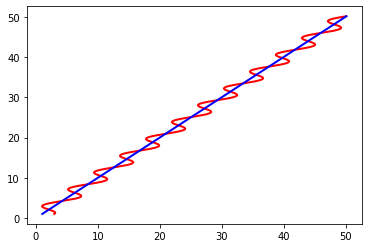

In [59]:
plt.plot(f0, x, linewidth=2, color='red')
plt.plot(E_h, x, linewidth=2, color='blue')
plt.show()

> Difference between MSE obtained by hypotheis and error obtained by bias and variance.

In [60]:
diff = error - mse
diff = np.mean(diff)

print('Difference =', diff)
print()
print('This difference is due to the noise we added. Also, it is pretty negligible.')
print('So, the equation MSE = (bias)\N{SUPERSCRIPT TWO} + variance can be verified.')

Difference = -3.798157101331245e-15

This difference is due to the noise we added. Also, it is pretty negligible.
So, the equation MSE = (bias)² + variance can be verified.


**-------------------------------------------------------------------------------------------**

> Complex hypothesis model : h(θ) = θ₀ + θ₁•x + θ₂•x² + ... θ₂₀•x²⁰ .

>> Plotting the true function along with its expectation i.e. its mean.

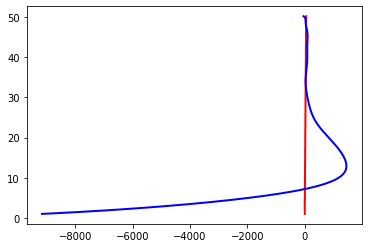

In [61]:
plt.plot(f0, x, linewidth=2, color='red')
plt.plot(E_h2, x, linewidth=2, color='blue')
plt.show()

>> Difference between MSE obtained by hypotheis and error obtained by bias and variance.

In [62]:
diff2 = error2 - mse2
diff2 = np.mean(diff2)

print('Difference =', diff2)
print()
print('This difference is due to the noise we added. Also, it is pretty negligible.')
print('So, the equation MSE = (bias)\N{SUPERSCRIPT TWO} + variance can be verified.')

Difference = 1.6616943349090363e-10

This difference is due to the noise we added. Also, it is pretty negligible.
So, the equation MSE = (bias)² + variance can be verified.


**---------------------- END OF CODE ----------------------**